In [230]:
import gmaps

In [231]:
import numpy as np
import pandas as pd
import requests
import time
# Dependencies
import requests
import json
# Google developer API key
from config import gkey
# Retrieve Google API key from config.py
from uszipcode import SearchEngine
import matplotlib.pyplot as plt
import time
homeless_df=pd.read_csv('homelessDataCsvByZipCode.csv')

In [232]:

de = homeless_df.drop(homeless_df.columns[0], axis = 1) 
de.set_index('address').sum()
#homeless_df.set_index('address')

count    90178
dtype: int64

In [233]:
de[['address','count']].groupby('address')

In [234]:
dataClenedAfter = de[['address','count']].groupby('address').sum().reset_index()

In [282]:
list(dataClenedAfter)



['address', 'count']

In [287]:
dataHomeLess = []
for index, row in dataClenedAfter.iterrows():
    try:
        zip = int(row['address'].split(",")[len(row['address'].split(","))-2].replace("CA","").strip())
        dataHomeLess.append([zip,row['count']])
    except:
        print("error")

error
error
error


In [288]:

zipCodeHomeLess = pd.DataFrame(dataHomeLess)

In [301]:
zipCodeHomeLess.columns = ['zip', 'count homeless']
zipCodeHomeLess= zipCodeHomeLess.groupby(['zip']).sum()

In [302]:
marijuana_df=pd.read_csv('CannabisLicData_cleaned.csv')
marijuana_zip=marijuana_df['Zip Code'].value_counts()
marijuana_zip.sort_index(inplace=True)
marijuana_zipDataFrame = marijuana_zip.to_frame().reset_index()
marijuana_zipDataFrame.columns = ['zip', 'count']


In [303]:
newData = pd.merge(zipCodeHomeLess, marijuana_zipDataFrame, on='zip', how='outer')


In [334]:
dataHomeLessAndPot = []
newData= newData.fillna(0)
zipCodesValid=pd.read_csv('laZipCodes.csv', encoding = "ISO-8859-1")

for index, row in newData.iterrows():
    if row['zip'] < 91608 :
        dataHomeLessAndPot.append([row['zip'],row['count'],row['count homeless']])
pddataHomeLessAndPot=pd.DataFrame(dataHomeLessAndPot)        

pddataHomeLessAndPot.columns = ['zip','count disp', 'count homeless']

pddataHomeLessAndPot.head()

,zip,count disp,count homeless
0,90001.0,3.0,1208.0
1,90002.0,0.0,790.0
2,90003.0,0.0,1718.0
3,90004.0,0.0,760.0
4,90005.0,0.0,392.0


In [332]:
"""dataCompletedData=pddataHomeLessAndPot[['count disp','count homeless']].groupby('count disp').mean().reset_index()
dataCompletedData

dataCompletedDataByPotShops=pddataHomeLessAndPot[['count disp','zip']].groupby('count disp').count().reset_index()
dataCompletedDataByPotShops
dataCompletedData
"""


,count disp,count homeless
0,0.0,249.768116
1,1.0,614.342857
2,2.0,255.058824
3,3.0,347.750000
4,4.0,245.500000
5,5.0,934.666667
6,6.0,199.000000
7,7.0,44.000000
8,8.0,318.000000
9,9.0,7946.000000


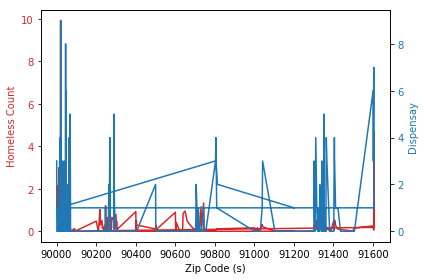

In [335]:
"""
plt.figure(0)
unemployed, = plt.plot(newData['zip'], newData['count homeless'], marker ='o', color='blue', label="Sine")
# Each point on the cosine chart is marked by a red triangle
plt.figure(1)
weed, = plt.plot(newData['zip'], newData['count'], marker='^', color='red', label="Cosine")"""


# Create some mock data
t = pddataHomeLessAndPot['zip']
data1 = pddataHomeLessAndPot['count homeless']/800
data2 = pddataHomeLessAndPot['count disp']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Zip Code (s)')
ax1.set_ylabel('Homeless Count', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Dispensay', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


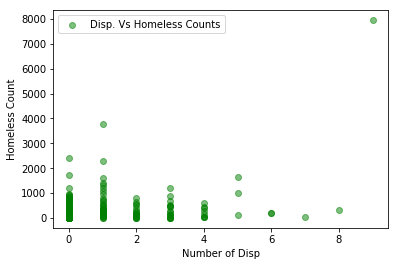

In [336]:
y = pddataHomeLessAndPot['count homeless']
x = pddataHomeLessAndPot['count disp']
s = np.random.rand(*x.shape) * 800 + 500

#plt.yscale('log',basey=2) 

plt.scatter(x, y,  c="g", alpha=0.5,
            label="Disp. Vs Homeless Counts")
plt.ylabel("Homeless Count")
plt.xlabel("Number of Disp")
plt.legend(loc='best')
plt.show()

In [309]:
#y = pddataHomeLessAndPot['count homeless']
#x = pddataHomeLessAndPot['count disp']
dataCompletedData=pddataHomeLessAndPot[['count disp','count homeless']].groupby('count disp').mean().reset_index()

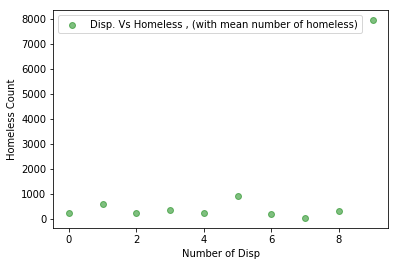

In [333]:

y = dataCompletedData['count homeless']
x = dataCompletedData['count disp']
s = np.random.rand(*x.shape) * 800 + 500

#plt.yscale('log',basey=2) 

plt.scatter(x, y,  c="g", alpha=0.5,
            label="Disp. Vs Homeless , (with mean number of homeless)")
plt.ylabel("Homeless Count")
plt.xlabel("Number of Disp")
plt.legend(loc='best')
plt.show()

In [337]:
newDataWith0 = newData.fillna(0)
for index, row in newDataWith0.iterrows():
    if row['zip'] < 91608 :
        dataHomeLessAndPot.append([row['zip'],row['count'],row['count homeless']])
pddataHomeLessAndPot=pd.DataFrame(dataHomeLessAndPot)        

pddataHomeLessAndPot.columns = ['zip','count disp', 'count homeless']

In [338]:
pddataHomeLessAndPot=pddataHomeLessAndPot.fillna(0)

In [339]:
dataCompletedData=pddataHomeLessAndPot[['zip','count disp','count homeless']].groupby('zip').mean().reset_index()




In [340]:
dataCompletedData.head()

,zip,count disp,count homeless
0,90001.0,3.0,1208.0
1,90002.0,0.0,790.0
2,90003.0,0.0,1718.0
3,90004.0,0.0,760.0
4,90005.0,0.0,392.0


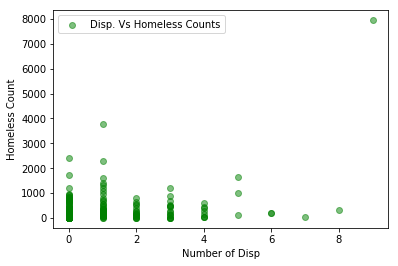

In [341]:
y = dataCompletedData['count homeless']
x = dataCompletedData['count disp']

#plt.yscale('log',basey=2) 

plt.scatter(x, y,  c="g", alpha=0.5,
            label="Disp. Vs Homeless Counts")
plt.ylabel("Homeless Count")
plt.xlabel("Number of Disp")
plt.legend(loc='best')
plt.show()

In [343]:
"""
y = dataCompletedData['count homeless']
x = dataCompletedData['count disp']
"""

dataCompletedData['count homeless'].corr(dataCompletedData['count disp'])


0.3146242006861716

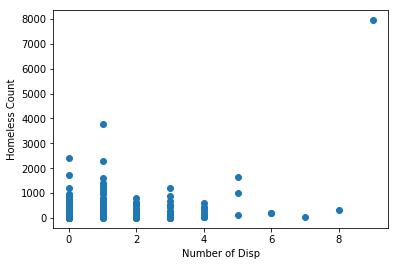

In [344]:

y = dataCompletedData['count homeless']
x = dataCompletedData['count disp']
plt.ylabel("Homeless Count")
plt.xlabel("Number of Disp")
plt.scatter(x, y, label="Disp. Vs Homeless Counts Mean")
plt.show()

In [317]:
zipCodeToLatLong=pd.read_csv('zipcode_coords_centroids.csv', encoding = "ISO-8859-1")

In [318]:
zipCodeToLatLong.head()

,ZIP,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135
